### Importing packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading data
df = pd.read_csv('data.csv', parse_dates=['date'])

In [3]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


### Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

> Annual Salary?


In [5]:
df_salaries = df[df['txn_description'] == 'PAY/SALARY'].groupby('customer_id')['amount'].mean()

In [6]:
df_salaries

customer_id
CUS-1005756958     970.47
CUS-1117979751    3578.65
CUS-1140341822    1916.51
CUS-1147642491    1711.39
CUS-1196156254    3903.73
                   ...   
CUS-72755508       725.32
CUS-809013380     1037.07
CUS-860700529     1808.62
CUS-880898248     1433.98
CUS-883482547     3977.46
Name: amount, Length: 100, dtype: float64

In [7]:
salaries = []
for customer in df.customer_id:
    salaries.append(int(df_salaries.loc[customer]))
df['salary'] = salaries

In [8]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement,salary
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit,1013
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit,1013
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit,1002
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit,892
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit,1013


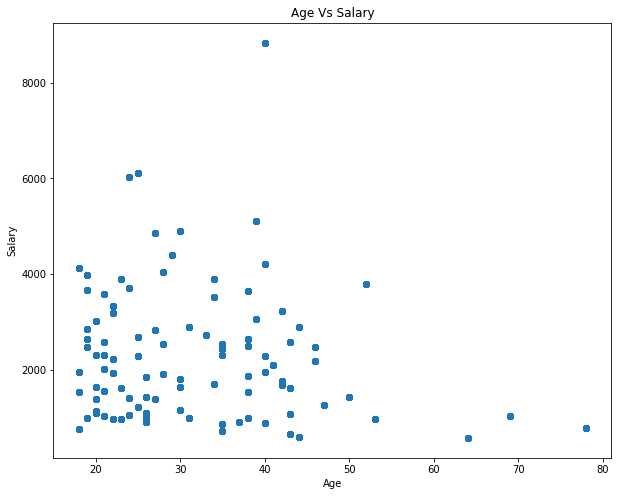

In [29]:
plt.figure(figsize=(10,8))
plt.scatter(df['age'], df['salary']);
plt.xlabel('Age');
plt.ylabel('Salary');
plt.title('Age Vs Salary');
plt.savefig('fig-5.png')

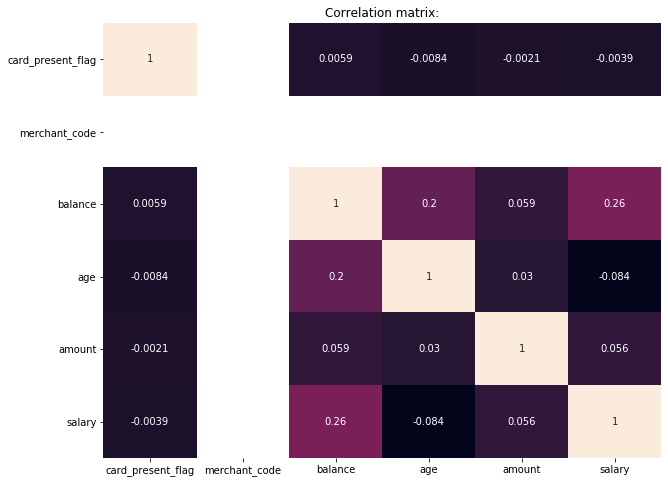

In [30]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cbar=False)
plt.title("Correlation matrix:");
plt.savefig('fig-6.png')

We can observe the missing data above

## Predictive Analytics

In [31]:
df_cats = df[['txn_description', 'gender', 'age', 'merchant_state', 'movement']]

In [32]:
pd.get_dummies(df_cats).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [33]:
X = pd.get_dummies(df_cats)
X.head(3)

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1


In [34]:
y = df['salary']


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=False)

**Linear regression**

In [17]:
linearreg = LinearRegression()
linearreg.fit(X_train, y_train)
linearreg.score(X_train, y_train)
linearreg.score(X_test, y_test)

0.0802716971739863

**Decision Tree**

In [18]:
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_model.score(X_test, y_test)

0.7100799631422743

**Random Forest**

In [19]:
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_model.score(X_test, y_test)

0.7128617048168595

In [20]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
training_scores = []
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    training_scores.append(score*100)
    

In [21]:
training_scores

[7.603594231930622, 74.18959841696562, 74.09229653651188]

In [22]:
training_scores_df = pd.DataFrame(training_scores, index = ['Linear Regression', 'Decision Tree', 'Random Forest'])
training_scores_df.columns=['score']
training_scores_df

,score
Linear Regression,7.603594
Decision Tree,74.189598
Random Forest,74.092297


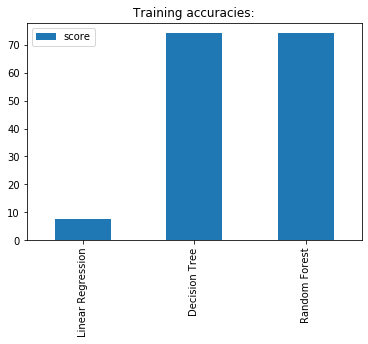

In [35]:
training_scores_df.plot(kind='bar');
plt.title("Training accuracies:");
plt.savefig('train-accuries.png')

In [24]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
scores = []
for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score*100)
    

In [25]:
scores

[8.02716971739863, 70.993223946378, 71.49678711654542]

In [26]:
scores_df = pd.DataFrame(scores, index = ['Linear Regression', 'Decision Tree', 'Random Forest'])

In [27]:
scores_df.columns=['score']
scores_df

,score
Linear Regression,8.027170
Decision Tree,70.993224
Random Forest,71.496787


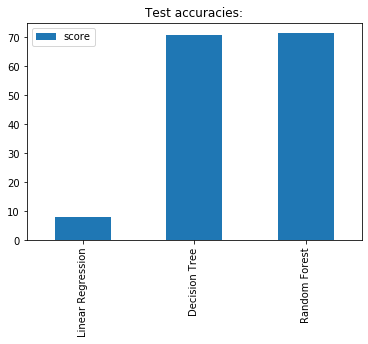

In [36]:
scores_df.plot(kind='bar');
plt.title('Test accuracies:');
plt.savefig('test-accuraies.png')